### I. SETUP

In [199]:
import json
import pandas as pd

from wordcloud import WordCloud

import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
def create_tweets_df(tweets):
    ''' CREATES DATAFRAME FROM TWEETS : 'text' - TWEET 
                                        'hashtags' - HASHTAGS USED IN TWEET 
                                        'created_at' - DATE/TIME WHEN TWEET WAS CREATED 
                                        'location' - USER-DEFINED LOCATION FOR USER'S ACCOUNT 
                                        'lang' - MACHINE-DETECTED LANGUAGE OF TWEET 
                                        'coordinates' - GEOGRAPHIC LOCATION OF USER 
                                        
                                        https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object
                                        '''
    
    df = pd.DataFrame()
 
    df['text'] = list(map(lambda tweet: tweet['text'], tweets))
    df['hashtags'] = list(map(lambda tweet: tweet['entities']['hashtags'], tweets))
    df['created_at'] = list(map(lambda tweet: tweet['created_at'], tweets))
    df['location'] = list(map(lambda tweet: tweet['user']['location'], tweets))
    df['lang'] = list(map(lambda tweet: tweet['lang'], tweets))
    df['coordinates'] = list(map(lambda tweet: tweet['coordinates'], tweets))
 
    return df

### II. LOAD DATA

In [201]:
tweets_json = ['iphonex/iphonex_2017-11-27.json', 'iphonex/iphonex_2017-11-28.json']
tweets = []

for file in tweets_json:
    with open(file, 'r') as f:
        for line in f.readlines():
            tweets.append(json.loads(line))

In [202]:
tweets[1]

{'contributors': None,
 'coordinates': None,
 'created_at': 'Mon Nov 27 23:59:59 +0000 2017',
 'entities': {'hashtags': [{'indices': [16, 24], 'text': 'iPhoneX'},
   {'indices': [25, 36], 'text': 'Wallpapers'},
   {'indices': [62, 70], 'text': 'forfree'}],
  'symbols': [],
  'urls': [{'display_url': 'icloud.com/sharedalbum/#B…',
    'expanded_url': 'https://www.icloud.com/sharedalbum/#B0aG6XBubGQRpYt',
    'indices': [72, 95],
    'url': 'https://t.co/SNbHzSeCbs'}],
  'user_mentions': []},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 935297179606020096,
 'id_str': '935297179606020096',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'place': None,
 'possibly_sensitive': False,
 'retweet_count': 0,
 'retweeted': False,
 'source': '<a href="http

In [203]:
# CREATE DATAFRAME USING FUNCTION
df = create_tweets_df(tweets)

In [204]:
df.head()

,text,hashtags,created_at,location,lang,coordinates
0,RT @bbinko: พลังแห่งกล้อง #iPhoneX ถ่ายกระรอกห...,"[{'text': 'iPhoneX', 'indices': [26, 34]}]",Mon Nov 27 23:59:59 +0000 2017,EXO-​ L​ THAILAND,th,None
1,Just added some #iPhoneX #Wallpapers you can j...,"[{'text': 'iPhoneX', 'indices': [16, 24]}, {'t...",Mon Nov 27 23:59:59 +0000 2017,AIB,en,None
2,My moms iphoneX came in. Im a lil jealous 😢,[],Mon Nov 27 23:59:52 +0000 2017,"Bloomington, CA",en,None
3,Besh dahil san dosenang IphoneX ang ipamimigay...,[],Mon Nov 27 23:59:48 +0000 2017,"Pambansang Punong Rehiyon, Rep",tl,None
4,≪新製品／アクセサリ・サプライ Ranking★1位≫【LANYI 3pack iPhone...,[],Mon Nov 27 23:59:39 +0000 2017,,ja,None


In [205]:
df.shape

(4010, 6)

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4010 entries, 0 to 4009
Data columns (total 6 columns):
text           4010 non-null object
hashtags       4010 non-null object
created_at     4010 non-null object
location       4010 non-null object
lang           4010 non-null object
coordinates    41 non-null object
dtypes: object(6)
memory usage: 188.0+ KB


### III. CLEANUP DATA

In [207]:
# PARSE ONLY THE TWEETS IN ENGLISH, 'EN'
df = df.loc[df['lang'] == 'en'].reset_index()

In [208]:
df.head()

,index,text,hashtags,created_at,location,lang,coordinates
0,1,Just added some #iPhoneX #Wallpapers you can j...,"[{'text': 'iPhoneX', 'indices': [16, 24]}, {'t...",Mon Nov 27 23:59:59 +0000 2017,AIB,en,None
1,2,My moms iphoneX came in. Im a lil jealous 😢,[],Mon Nov 27 23:59:52 +0000 2017,"Bloomington, CA",en,None
2,6,RT @ShaunLip: Get my thoughts on the iPhoneX ...,"[{'text': 'connectpal', 'indices': [46, 57]}]",Mon Nov 27 23:59:33 +0000 2017,"Oakland, CA",en,None
3,13,"Yes I spent $1500 on a phone, but I’m a unicor...","[{'text': 'iPhoneX', 'indices': [49, 57]}, {'t...",Tue Nov 28 23:59:57 +0000 2017,,en,None
4,14,RT @claudiomkd: How app developers and designe...,"[{'text': 'iPhoneX', 'indices': [64, 72]}]",Tue Nov 28 23:58:28 +0000 2017,"Helsinki, Finland",en,None


In [209]:
df.shape

(3999, 7)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 7 columns):
index          3999 non-null int64
text           3999 non-null object
hashtags       3999 non-null object
created_at     3999 non-null object
location       3999 non-null object
lang           3999 non-null object
coordinates    41 non-null object
dtypes: int64(1), object(6)
memory usage: 218.8+ KB


In [211]:
df['text'].value_counts().head()

RT @winitonline: FOLLOW @PrizeSquad &amp; RETWEET TO #WIN THIS @Apple iPhone X, 256GB. #GIVEAWAY Ends: 7/12/17 #COMPETITION #iPhoneX https://t.…        289
RT @iPhone8andx: #Win one of these #iPhoneX &amp;amp; #iPhone8 😍📱 just RETWEET &amp;amp; FOLLOW us COMMENT THE ONE YOU WANT #Giveaway #Phone https:…    243
RT @commuter: iphone revolution:\n\niphone5s - finger id\niphoneX - face\niphoneXI - blood sample\niphone XII - dna sample                               65
RT @PrizeSquad: FOLLOW &amp; RETWEET TO #WIN THIS @Apple iPhone X, 256GB. #GIVEAWAY\nEnds: 7/12/17 #COMPETITION #iPhoneX https://t.co/YCrmhAMfmB         51
RT @JorgeYao87: Purchased the @Apple #iPhoneX and @LEGO_Group Ultimate Collector’s Series Millennium Falcon (75192).... should I keep going…             42
Name: text, dtype: int64

In [212]:
# REMOVE LINKS IN TWEETS

df['text'] = df['text'].str.replace('http\S+|www.\S+', '', case=False)
df['text'].value_counts().head()

RT @winitonline: FOLLOW @PrizeSquad &amp; RETWEET TO #WIN THIS @Apple iPhone X, 256GB. #GIVEAWAY Ends: 7/12/17 #COMPETITION #iPhoneX             289
RT @iPhone8andx: #Win one of these #iPhoneX &amp;amp; #iPhone8 😍📱 just RETWEET &amp;amp; FOLLOW us COMMENT THE ONE YOU WANT #Giveaway #Phone     243
RT @commuter: iphone revolution:\n\niphone5s - finger id\niphoneX - face\niphoneXI - blood sample\niphone XII - dna sample                        65
RT @PrizeSquad: FOLLOW &amp; RETWEET TO #WIN THIS @Apple iPhone X, 256GB. #GIVEAWAY\nEnds: 7/12/17 #COMPETITION #iPhoneX                          51
#Win one of these #iPhoneX &amp;amp; #iPhone8 😍📱 just RETWEET &amp;amp; FOLLOW us COMMENT THE ONE YOU WANT #Giveaway #Phone…                      42
Name: text, dtype: int64

In [213]:
wordtext = " ".join(df['text'])

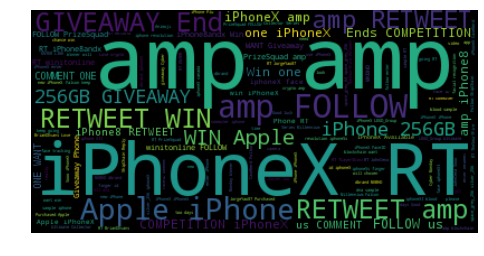

In [218]:
# CREATE WORDCLOUD FROM TWEETS

sns.set() 
wordcloud = WordCloud().generate(wordtext)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()